Topic Modelling
1- Used to get information from a very last dataset corpus without reading the actual text
2- eg: from a big criminal dataset we can get the information in which reason the crime is happening more etc.

Drawback of TF-IDF:
1- Every document will have only 1 topic, they cannot have multiple topics. To overcome this, LDA came into picture. LDA can have multiple topics for a document.
2- If the document is small less than 100 words, use TF-IDF else use LDA.


In [1]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json 
import glob
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
def load_data(file):
    with open(file,"r",encoding="utf-8") as f:
        data = json.load(f)
    return (data)

In [3]:
def write_data(file,data):
    with open(file,"w",encoding="utf-8") as f:
        json.dump(data,f,indent=4)
    

In [4]:
def remove_stops(text,stops):
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text) #remove all of the AC numbers
    words = text.split()
    final = []
    for word in words:
        if word not in stops: #remove stops
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("","",string.punctuation)) #remove punctuations
    final = "".join([i for i in final if not i.isdigit()]) #remove digit
    while "  " in final:
        final = final.replace("  "," ") # remove double space with single space
    return (final)
    

In [5]:
def clean_docs(docs):
    #list of desc
    stops = stopwords.words("english")
    months = load_data("data/months.json")
    stops = stops + months
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc,stops)
        final.append(clean_doc)
    return (final)


In [6]:
descriptions = load_data("data/trc_dn.json")["descriptions"]
names = load_data("data/trc_dn.json")["names"]

In [7]:
cleaned_docs = clean_docs(descriptions)

In [8]:
cleaned_docs[0]

'An ANCYL member shot severely injured SAP members Lephoi Bethulie Orange Free State OFS Police opened fire gathering ANC supporters house following dispute two neighbours one linked ANC SAP councillor'

In [9]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8, #words that occurs more than 80% in all documents delete it
                                min_df=5, #less than 5 remove
                                ngram_range = (1,3), #1,2,3 gram all 3 will run
                                stop_words = "english"
                            )

vectors = vectorizer.fit_transform(cleaned_docs)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
    
print (descriptions[0])
print (all_keywords[0])



An ANCYL member who was shot and severely injured by SAP members at Lephoi, Bethulie, Orange Free State (OFS) on 17 April 1991. Police opened fire on a gathering at an ANC supporter's house following a dispute between two neighbours, one of whom was linked to the ANC and the other to the SAP and a councillor.
['anc', 'anc supporters', 'house', 'injured', 'member', 'members', 'police', 'sap', 'severely', 'shot', 'supporters']


In [10]:
true_k = 20
model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open ("data/trc_results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")


# Plotting


In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
kmean_indices = model.fit_predict(vectors)

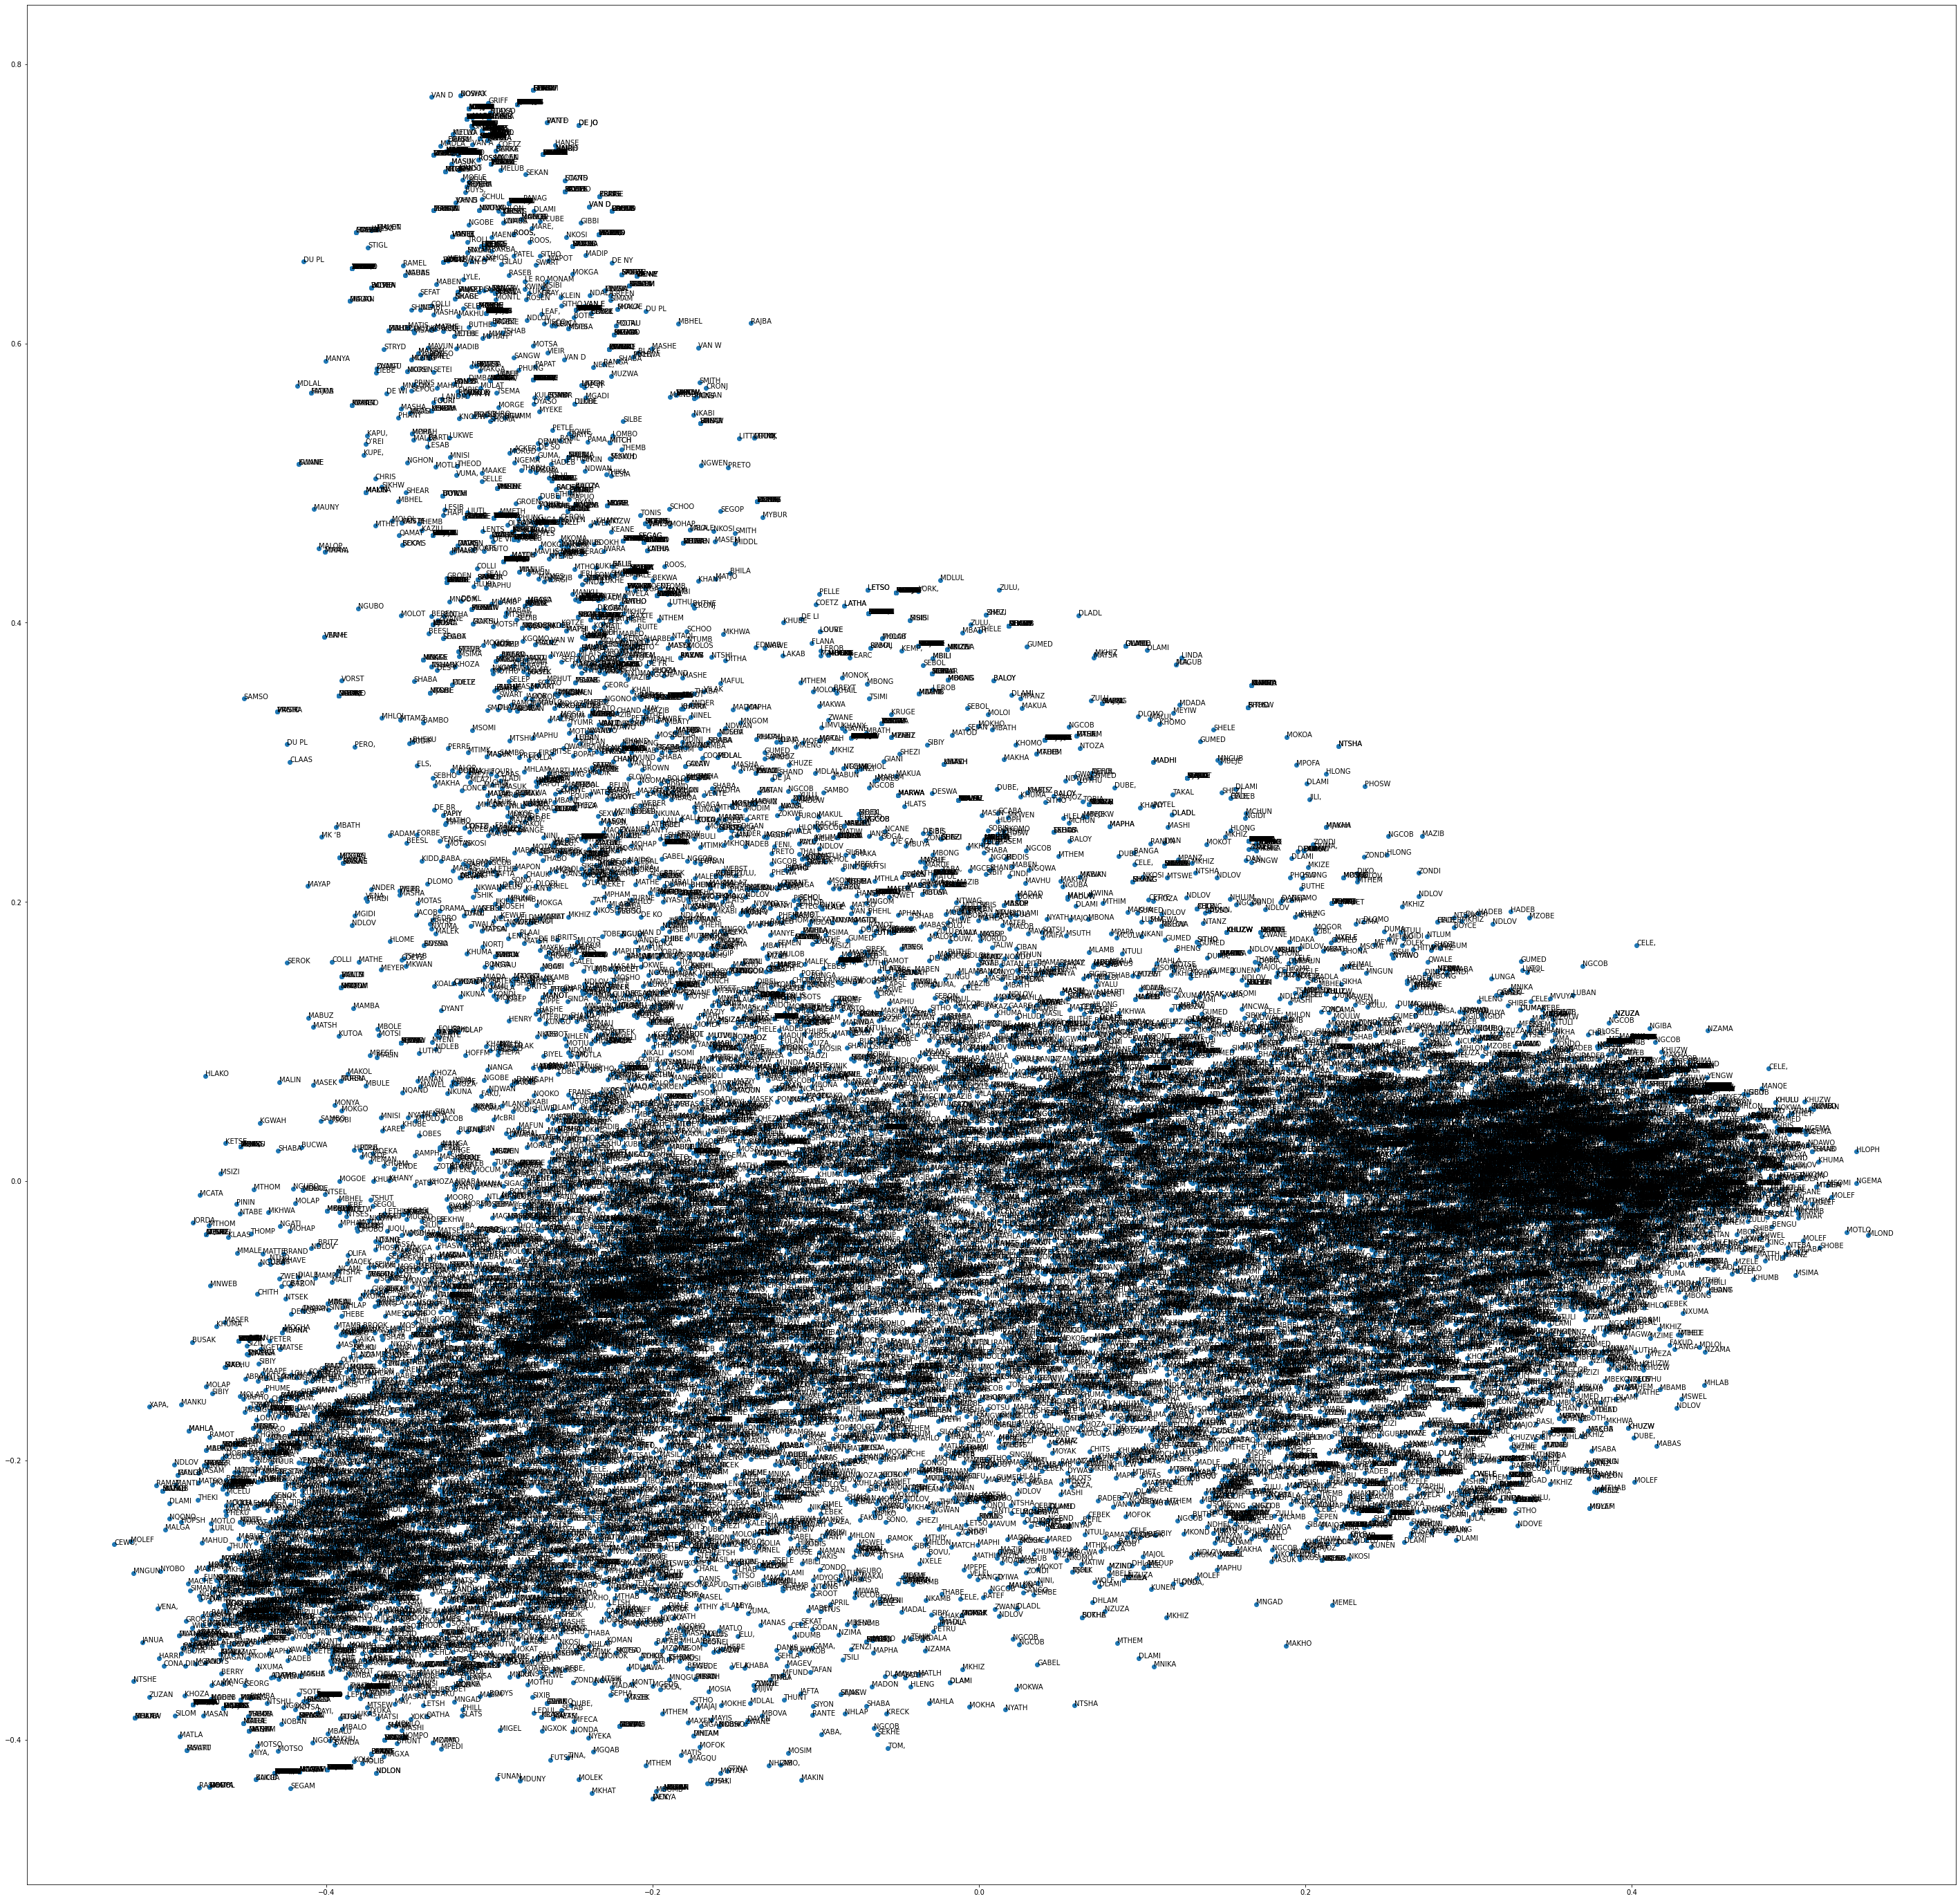

In [14]:
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
colors = ["r","b","c","y","m"]
x_axis = [o[0] for o in scatter_plot_points]

y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(50,50)) ##,c=[colors[d] for d in kmean_indices]


ax.scatter(x_axis,y_axis)

for i,txt in enumerate(names):
    ax.annotate(txt[0:5],(x_axis[i],y_axis[i]))
plt.savefig("trc.png")

## Latent Dirchlet Allocation

Better than K-MEANS Clusturing
In Kmeans each documet is clustured into a single document only.
However in LDA each document can have multiple topics


In [16]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushtripathi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
import numpy as np
import json
import glob

#Gensim

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#Spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [59]:
import pyLDAvis.gensim

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [25]:
def load_data(file):
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file,data):
    with open(file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [26]:
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
data = load_data("data/ushmm_dn.json")["texts"]
print(data[0][0:90])

 My name David Kochalski. I was born in a small town called , and I was born May 5, 1928. 


In [ ]:
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [40]:
def lemmatization(texts, allowed_postags= ["NOUN","ADJ","VERB","ADV"]):
    nlp = spacy.load("en_core_web_sm", disable= ["parser","ner"])
    text_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        text_out.append(final)
    return (text_out)
        
    

In [41]:
lemmatized_texts = lemmatization(data)
print(lemmatized_texts[0][0:90])

name bear small town call bear well very hard work child father mother small mill flour bu


In [42]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text,deacc=True)
        final.append(new)
    return (final)
    

In [43]:
data_words = gen_words(lemmatized_texts)
print(data_words[0][0:20])

['name', 'bear', 'small', 'town', 'call', 'bear', 'well', 'very', 'hard', 'work', 'child', 'father', 'mother', 'small', 'mill', 'flour', 'buckwheat', 'prosperous', 'comfortable', 'go']


In [44]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)
    
print(corpus[0][0:20])

[(0, 2), (1, 10), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 2), (8, 3), (9, 1), (10, 12), (11, 1), (12, 8), (13, 1), (14, 2), (15, 1), (16, 3), (17, 2), (18, 1), (19, 2)]


In [51]:
word = id2word[[0][:1][0]]
print(word)

able


In [53]:
lda_model = gensim.models.ldamodel.LdaModel(corpus =corpus,
                                           id2word = id2word,
                                           num_topics = 30,
                                           random_state = 100,
                                            update_every=1,
                                            chunksize= 100,
                                            passes = 10,
                                            alpha = "auto"
                                           )

# Visualize

In [60]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,mds="mmds",R=30) # use gensim_models instead of gensim
vis

/Users/ayushtripathi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/ayushtripathi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ayushtripathi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ayushtripathi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ayu

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.322455  0.262360       1        1  24.294240
29     0.281474  0.086781       2        1  21.622474
8      0.384957  0.228869       3        1  12.215941
17     0.328271  0.201022       4        1  11.823930
14     0.358064  0.130658       5        1  11.011995
25     0.391258  0.064280       6        1   9.658105
20     0.302214  0.350137       7        1   7.791784
3      0.417634 -0.121597       8        1   1.417028
18     0.040408 -0.248443       9        1   0.154244
19    -0.146701 -0.033637      10        1   0.004538
2     -0.133987 -0.046015      11        1   0.000306
28    -0.133994 -0.046018      12        1   0.000301
26    -0.133992 -0.046018      13        1   0.000299
9     -0.133998 -0.046020      14        1   0.000298
24    -0.133998 -0.046020      15        1   0.000297
10    -0.133999 -0.046020      16        1   0.000296
1     -0.133999 -0.046020      17        1   0.000296
23    -0.133999 -0.046020      18        1   0.000294
13    -0.134003 -0.046022      19        1   0.000293
0     -0.134004 -0.046022      20        1   0.000283
21    -0.134005 -0.046023      21        1   0.000282
4     -0.134005 -0.046023      22        1   0.000280
6     -0.134006 -0.046023      23        1   0.000278
5     -0.134006 -0.046023      24        1   0.000277
16    -0.134006 -0.046023      25        1   0.000277
12    -0.134006 -0.046023      26        1   0.000277
7     -0.134007 -0.046024      27        1   0.000274
22    -0.134008 -0.046024      28        1   0.000272
11    -0.134008 -0.046024      29        1   0.000271
27    -0.134008 -0.046024      30        1   0.000271, topic_info=       Term         Freq        Total Category  logprob  loglift
683     run  2343.000000  2343.000000  Default  30.0000  30.0000
892    year  3466.000000  3466.000000  Default  29.0000  29.0000
152   child  3170.000000  3170.000000  Default  28.0000  28.0000
133    camp  4522.000000  4522.000000  Default  27.0000  27.0000
803   think  5635.000000  5635.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
643  really     0.000165  3247.677933  Topic30  -9.6434  -3.9795
485    make     0.000165  5070.537612  Topic30  -9.6434  -4.4251
758   start     0.000165  3697.035409  Topic30  -9.6434  -4.1092
859     war     0.000165  3085.745890  Topic30  -9.6434  -3.9285
498    mean     0.000165  2910.152172  Topic30  -9.6435  -3.8699

[3058 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5647      2  0.981722  academic
904       1  0.080228    accept
904       2  0.649115    accept
904       3  0.003647    accept
904       4  0.113048    accept
...     ...       ...       ...
892       9  0.006634      year
3960      2  0.080578     zloty
3960      3  0.859500     zloty
3960      4  0.080578     zloty
8529      9  0.905731      zoom

[2225 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 30, 9, 18, 15, 26, 21, 4, 19, 20, 3, 29, 27, 10, 25, 11, 2, 24, 14, 1, 22, 5, 7, 6, 17, 13, 8, 23, 12, 28])

# Issues with above

If you see the clusture they are not very well formed. Since words like go, would,so have higher frequency as compa